## PROBLEM 3 - Exercise 8.2 - Number of Correctly Stuffed Letters looks Poisson(ous)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd

In [5]:
from IPython.display import Markdown # Needed for the Markdown
from tabulate import tabulate

In [6]:
def poisson(k, l):
    return (l**k * np.e**(-l)) / (math.factorial(k))

In [7]:
def manual(n, printer=False):
    # create a set that outlines one envelope designated for each person
    envelopes_set = {""}

    numMatches = 0

    # write out an envelope for each person
    for personID in range(n):
        envelopes_set.add(personID)

    # for each person's designated letter
    for personID in range(n):
        # pick up a random envelope
        letterID = rnd.choice(list(envelopes_set))
        envelopes_set.remove(letterID)

        #see if the letter & envelope match
        if personID == letterID:
            numMatches += 1
        
    return numMatches

In [8]:
def manual_distribution(n, numTrials):
    results = np.zeros(n+2)
    for i in range(numTrials):
        results[manual(n)] += 1
    return results / numTrials

In [9]:
# for i in range(100):
#     print(manual(100, printer=True))

In [10]:
numTrials = 100
row = {}

# get the manual distributions
man_distrs = {}
for n in [5,10,100,1000,10000]:
    man_distrs[n] = manual_distribution(n, numTrials)

print("here!")

header = ["k value"]
for k in [0,1,2,3,4,5,6]:
    row[k] = [f"K = {k}"]
    for n in [5,10,100,1000,10000]:
        row[k].append(f"{(man_distrs[n][k]):.4g}")
        header.append(f"n = {n}")

    row[k].append(poisson(k, 1))
    header.append("Poisson")

table = [row[0], row[1], row[2], row[3], row[4], row[5], row[6]]

print(tabulate(table,headers=header))
print()

here!
k value      n = 5    n = 10    n = 100    n = 1000    n = 10000      Poisson
---------  -------  --------  ---------  ----------  -----------  -----------
K = 0         0.45      0.4        0.35        0.43         0.26  0.367879
K = 1         0.31      0.41       0.39        0.37         0.4   0.367879
K = 2         0.2       0.13       0.18        0.15         0.25  0.18394
K = 3         0.03      0.05       0.07        0.05         0.06  0.0613132
K = 4         0.01      0          0.01        0            0.03  0.0153283
K = 5         0         0.01       0           0            0     0.00306566
K = 6         0         0          0           0            0     0.000510944



In [13]:
error = {}
for n in [5,10,100,1000,10000]:
    error[n] = 0
    for k in [0,1,2,3,4,5,6]:
        error[n] += abs(man_distrs[n][k] - poisson(k, 1))



Text(0.5, 1.0, 'Total variation between Empirical distribution and Poisson(1)')

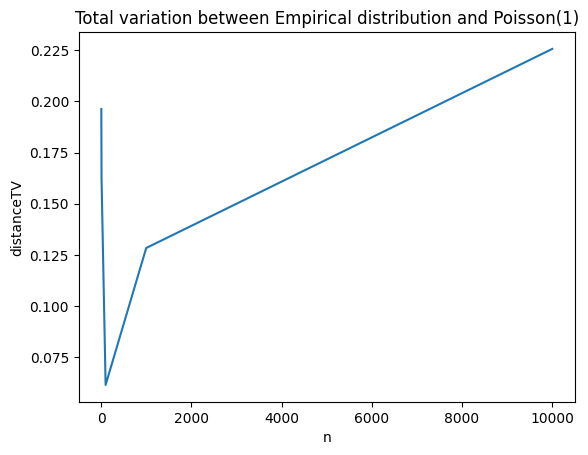

In [14]:
# plot a graph of the error
plt.plot([5,10,100,1000,10000], [error[5],error[10],error[100],error[1000],error[10000]])
plt.xlabel("n")
plt.ylabel("distanceTV")
plt.title("Total variation between Empirical distribution and Poisson(1)")